In [186]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter 
import pandas_profiling as pp

In [187]:
import os
for dirname, _, filenames in os.walk('/Users/ganesh/Workspzace/BigDataAnalytics/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [188]:
hdf = pd.read_csv('/Users/ganesh/Workspace/BigDataAnalytics/Data/Hospital_Inpatient_LengthOfStay.csv')
hdf

/Users/ganesh/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,Payment Typology 2,Payment Typology 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,...,NaN,NaN,267162.0,NaN,NaN,0,N,Y,$5620.00,$4561.28
1,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,18 to 29,147,F,White,Not Span/Hispanic,...,NaN,NaN,275408.0,NaN,NaN,0,N,Y,$7404.18,$6933.94
2,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,30 to 49,147,M,White,Not Span/Hispanic,...,NaN,NaN,267162.0,NaN,NaN,0,N,Y,$7931.28,$7154.85
3,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,...,NaN,NaN,271326.0,NaN,NaN,0,N,Y,$11304.44,$4584.11
4,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,50 to 69,147,M,White,Not Span/Hispanic,...,NaN,NaN,243034.0,NaN,NaN,0,N,Y,$8330.50,$4361.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346755,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Medicare,Private Health Insurance,201565.0,NaN,NaN,0,N,Y,$43494.00,$6637.09
2346756,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,117,M,White,Not Span/Hispanic,...,NaN,NaN,251080.0,272191.0,NaN,0,N,Y,$16662.00,$3236.18
2346757,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,119,M,White,Unknown,...,NaN,NaN,198807.0,NaN,NaN,0,N,N,$7142.00,$1862.39
2346758,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Medicare,Blue Cross/Blue Shield,268633.0,NaN,NaN,0,N,Y,$13070.00,$2744.13


Reading the dataset shows a warning of mixed dataset. This is due to the '$' with float type. So let's check the datatypes for wrangling the data.

In [189]:
hdf.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

As infered, columns Total Charges and Total Costs are of object type due to the '$'. We'll wrangle the data in the Data Wrangling section.


# Data Wrangling

Let's check for null values in our dataset.

In [190]:
hdf.isnull().sum()

Health Service Area                       2911
Hospital County                           2911
Operating Certificate Number              2911
Facility Id                               2911
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       4427
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr



Next,We try to determine the percentage of null data to check if the dataset is balanced or not

In [191]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = round(total/len(data)*100,2)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data(hdf)

,Total,Percent
Other Provider License Number,2275424,96.96
Payment Typology 3,1645570,70.12
Payment Typology 2,762346,32.49
Operating Provider License Number,612848,26.11
Zip Code - 3 digits,4427,0.19
Hospital County,2911,0.12
Attending Provider License Number,2911,0.12
Health Service Area,2911,0.12
Facility Id,2911,0.12
Operating Certificate Number,2911,0.12


From above table, we found few columns have large number of null values. For these columns, we simply drop them as they have more than 1/4th null data and do not provide much information.

In [192]:
hdf = hdf.drop(['Other Provider License Number','Payment Typology 2','Payment Typology 3','Operating Provider License Number'], axis=1)
hdf.isnull().sum()

Health Service Area                    2911
Hospital County                        2911
Operating Certificate Number           2911
Facility Id                            2911
Facility Name                             0
Age Group                                 0
Zip Code - 3 digits                    4427
Gender                                    0
Race                                      0
Ethnicity                                 0
Length of Stay                            0
Type of Admission                         0
Patient Disposition                       0
Discharge Year                            0
CCS Diagnosis Code                        0
CCS Diagnosis Description                 0
CCS Procedure Code                        0
CCS Procedure Description                 0
APR DRG Code                              0
APR DRG Description                       0
APR MDC Code                              0
APR MDC Description                       0
APR Severity of Illness Code    

From the table above, we found that some columns have a few null values, which can be dropped easily.

In [193]:
hdf = hdf.dropna(subset=['APR Severity of Illness Description', 'APR Risk of Mortality','Zip Code - 3 digits','Facility Id','Attending Provider License Number'])
hdf.isnull().sum()

Health Service Area                    0
Hospital County                        0
Operating Certificate Number           0
Facility Id                            0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mort

Some numerical data columns have '$' which make them objects. we try to convert it to other datatypes improve the computation efficiency

First, we tried to convert length of stay, to improve the possibility for regression analysis.

In [194]:
hdf['Length of Stay'] = hdf['Length of Stay'].apply(lambda x: str(x).split(' ')[0])
hdf['Length of Stay'] = pd.to_numeric(hdf['Length of Stay'])

Next, we tried to modify Total Costs and Total Charges which was an object type due to the presence of '$'.

In [195]:
hdf['Total Costs'] = hdf['Total Costs'].apply(lambda x: str(x).replace('$',''))
hdf['Total Costs'] = pd.to_numeric(hdf['Total Costs'])
hdf['Total Charges'] = hdf['Total Charges'].apply(lambda x: str(x).replace('$',''))
hdf['Total Charges'] = pd.to_numeric(hdf['Total Charges'])

Next, Zip code has OOS instead of numbers. It has 67000 rows which is quite large to just drop, so we modify it to a 3 digit code to make it significant for analysis.

We also try to rename with less complex name.

In [196]:
hdf['Zip Code - 3 digits'] = hdf['Zip Code - 3 digits'].apply(lambda x: str(x).replace('OOS','999'))  
hdf['Zip Code - 3 digits'] = pd.to_numeric(hdf['Zip Code - 3 digits'])
hdf = hdf.rename(columns={'Zip Code - 3 digits':'Zip Code'})

Now let's check the dtypes

The data columns are modified

In [197]:
hdf.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code                                 int64
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                           int64
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [198]:
display(hdf)

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Attending Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Minor,Medical,Medicaid,267162.0,0,N,Y,5620.00,4561.28
1,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,18 to 29,147,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicaid,275408.0,0,N,Y,7404.18,6933.94
2,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,30 to 49,147,M,White,Not Span/Hispanic,...,Minor,Minor,Medical,Medicaid,267162.0,0,N,Y,7931.28,7154.85
3,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Minor,Medical,Medicare,271326.0,0,N,Y,11304.44,4584.11
4,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,50 to 69,147,M,White,Not Span/Hispanic,...,Moderate,Moderate,Medical,Medicaid,243034.0,0,N,Y,8330.50,4361.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346755,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Moderate,Moderate,Medical,Medicare,201565.0,0,N,Y,43494.00,6637.09
2346756,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,117,M,White,Not Span/Hispanic,...,Minor,Minor,Medical,Private Health Insurance,251080.0,0,N,Y,16662.00,3236.18
2346757,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,119,M,White,Unknown,...,Minor,Minor,Medical,Medicaid,198807.0,0,N,N,7142.00,1862.39
2346758,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Minor,Moderate,Medical,Medicare,268633.0,0,N,Y,13070.00,2744.13


After wrangling, we have 2342221 patient records

# Exploratory Data Analysis 

Let's first describe the dataset

In [199]:
hdf.describe()

,Operating Certificate Number,Facility Id,Zip Code,Length of Stay,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Birth Weight,Total Charges,Total Costs
count,2.342221e+06,2.342221e+06,2.342221e+06,2.342221e+06,2342221.0,2.342221e+06,2.342221e+06,2.342221e+06,2.342221e+06,2.342221e+06,2.342221e+06,2.342221e+06,2.342221e+06,2.342221e+06
mean,5.006227e+06,1.043141e+03,1.430993e+02,5.480060e+00,2015.0,1.905596e+02,1.127538e+02,4.178865e+02,1.042384e+01,2.011237e+00,2.176400e+06,3.264818e+02,4.323095e+04,1.599223e+04
std,2.259531e+06,7.135456e+02,1.476467e+02,8.035354e+00,0.0,1.597189e+02,8.897563e+01,2.414170e+02,5.926276e+00,8.974071e-01,1.201709e+07,1.000243e+03,8.046165e+04,3.239425e+04
min,1.010000e+05,1.000000e+00,1.000000e+02,1.000000e+00,2015.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.150000e+02,0.000000e+00,1.000000e-02,0.000000e+00
25%,2.951001e+06,5.410000e+02,1.090000e+02,2.000000e+00,2015.0,1.060000e+02,0.000000e+00,2.000000e+02,5.000000e+00,1.000000e+00,1.923170e+05,0.000000e+00,1.203386e+04,4.725780e+03
50%,5.907001e+06,1.099000e+03,1.140000e+02,3.000000e+00,2015.0,1.580000e+02,1.320000e+02,3.830000e+02,9.000000e+00,2.000000e+00,2.294950e+05,0.000000e+00,2.350105e+04,8.797000e+03
75%,7.002009e+06,1.450000e+03,1.290000e+02,6.000000e+00,2015.0,2.180000e+02,2.160000e+02,6.400000e+02,1.500000e+01,3.000000e+00,2.579100e+05,0.000000e+00,4.664500e+04,1.684466e+04
max,7.004010e+06,9.431000e+03,9.990000e+02,1.200000e+02,2015.0,9.170000e+02,9.990000e+02,9.520000e+02,2.500000e+01,4.000000e+00,9.100000e+07,9.900000e+03,7.248391e+06,5.236615e+06


To get a generalised analysis of data, we make study Correlation of the dataset

In [200]:
hdf.corr()

,Operating Certificate Number,Facility Id,Zip Code,Length of Stay,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Birth Weight,Total Charges,Total Costs
Operating Certificate Number,1.000000,0.671427,-0.008948,0.019773,NaN,0.037451,0.182444,0.041818,0.042960,-0.040274,0.014907,0.016243,0.079536,0.089602
Facility Id,0.671427,1.000000,-0.009727,0.004807,NaN,0.023708,0.165177,0.049937,0.047917,-0.048904,-0.011606,0.064506,0.043598,0.039116
Zip Code,-0.008948,-0.009727,1.000000,-0.000521,NaN,-0.012238,-0.025490,-0.024196,-0.020768,0.002322,-0.000657,-0.020364,0.037635,0.033836
Length of Stay,0.019773,0.004807,-0.000521,1.000000,NaN,0.112335,0.042104,0.073869,0.102193,0.346384,0.001762,-0.063525,0.705733,0.681471
Discharge Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCS Diagnosis Code,0.037451,0.023708,-0.012238,0.112335,NaN,1.000000,0.117378,0.440546,0.460501,-0.192301,0.046578,0.055410,-0.086666,-0.059513
CCS Procedure Code,0.182444,0.165177,-0.025490,0.042104,NaN,0.117378,1.000000,0.193458,0.189927,-0.016623,-0.004515,0.161019,0.012626,0.021928
APR DRG Code,0.041818,0.049937,-0.024196,0.073869,NaN,0.440546,0.193458,1.000000,0.968780,-0.107008,0.029933,0.294360,-0.094946,-0.071502
APR MDC Code,0.042960,0.047917,-0.020768,0.102193,NaN,0.460501,0.189927,0.968780,1.000000,-0.097369,0.032331,0.249770,-0.061154,-0.038677
APR Severity of Illness Code,-0.040274,-0.048904,0.002322,0.346384,NaN,-0.192301,-0.016623,-0.107008,-0.097369,1.000000,-0.011330,-0.251249,0.330880,0.287842


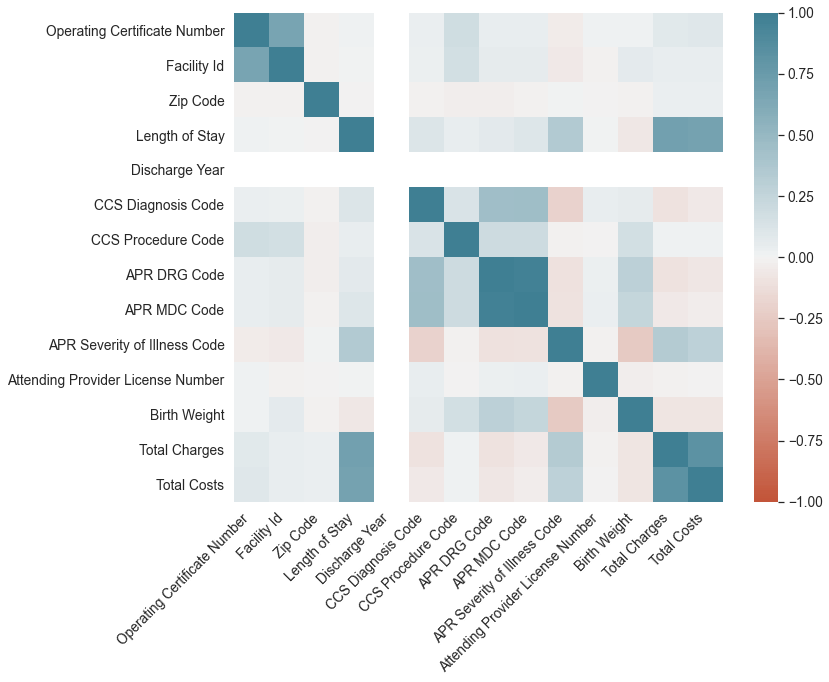

In [201]:
f, ax = plt.subplots(figsize=(11, 9))
corr = hdf.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From this initial look at a correlation matrix of our data, we can see that a couple of features have relatively strong positive correlation with each other, and more importantly, length of stay.

we can see from it that APR Severity of Illness Code has a strong positive correlation with length of stay, along with total charges and total costs. CCS Diagnosis code also seems to have a slight positive correlation with length of stay. 

We can see other positive correlations in the dataset between features such as CCS Diagnosis codes and APR DRG codes.

#  Data Visualization

We try to visualize underlying relationships in the data. 
For the following analysis, we keep length of stay as the primary varaiable along the y-axis since it is the predictor variable for this project. 
Thus, we are most interested at looking how features in this dataset affect length of stay.

First lets look at the univariate distribution of length of stay values in the dataset

/Users/ganesh/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


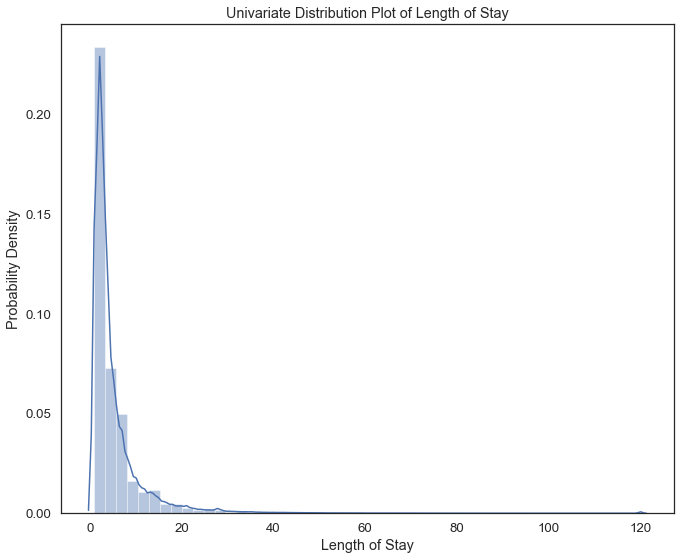

In [202]:
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sns.distplot(hdf['Length of Stay'], norm_hist=False);
plt.ylabel('Probability Density')
plt.title('Univariate Distribution Plot of Length of Stay')
plt.show()

We can see this distribution is very skewed.

From the hdf.describe() output, we can see that the 25%, 50% and 75% quartile of values are all 0. The histogram below confirms that most of the birth weights are 0. This makes sense when we consider that this column is probably only relevant for new born babies, and is entered as 0 for all other patients.

We try to analyse the birth weight with type of admission and Age group

In [203]:
birth_weight_df = hdf[['Type of Admission', 'Birth Weight']].groupby('Type of Admission').mean()
display(birth_weight_df)

,Birth Weight
Type of Admission,
Elective,5.034854
Emergency,10.307987
Newborn,3259.013067
Not Available,42.820513
Trauma,2.205882
Urgent,47.163954


In [204]:
weight_age_df = hdf[['Age Group', 'Birth Weight']].groupby('Age Group').mean()
display(weight_age_df)

,Birth Weight
Age Group,
0 to 17,2172.11362
18 to 29,0.00000
30 to 49,0.00000
50 to 69,0.00000
70 or Older,0.00000


we try to relate birth weigth and length of Stay of newborns as it is significant

/Users/ganesh/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Birth Weight', ylabel='Length of Stay'>

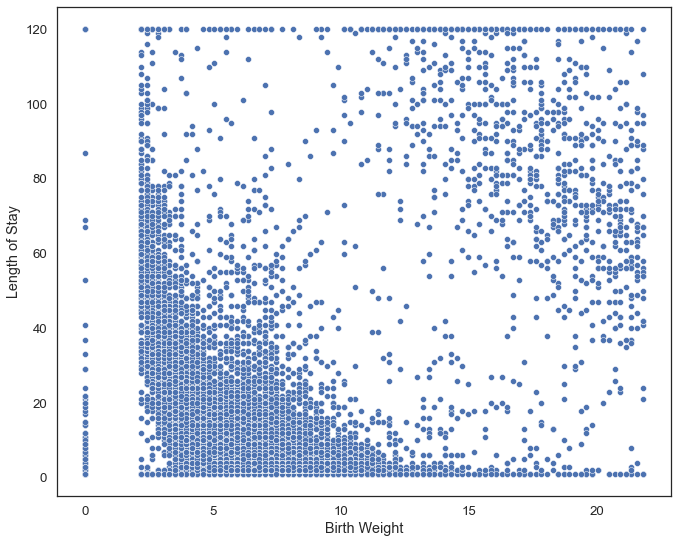

In [205]:
birth_youngest_stay = hdf[hdf['Type of Admission'].str.contains('Newborn')]
birth_youngest_stay['Birth Weight'] = birth_youngest_stay['Birth Weight'].apply(lambda x: float(x/454)) #convert from grams to pounds
f, ax = plt.subplots(figsize=(11, 9))
sns.scatterplot(x="Birth Weight", y="Length of Stay",data=birth_youngest_stay)

we can see two distinct clusters - one at the lower left hand corner and one at the upper right.

These babies seem to have particularly long lengths of stay as they are clustered at the top right hand corner of the graph. This indicates to me that birth weight might be an important feature for predicting length of stay for newborns.

Next, we try to analyse what are the babies with longest length of stay is diagonised with

In [206]:
longest_newborn_df = birth_youngest_stay[birth_youngest_stay['Length of Stay']==120]
display(longest_newborn_df)

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Attending Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
45429,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,0 to 17,140,F,White,Spanish/Hispanic,...,Major,Major,Surgical,Medicaid,258238.0,2.863436,N,N,1350063.88,603986.00
45432,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,0 to 17,142,F,White,Not Span/Hispanic,...,Extreme,Extreme,Surgical,Medicaid,276100.0,3.303965,N,N,3225104.60,1122211.52
45435,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,0 to 17,142,M,White,Not Span/Hispanic,...,Extreme,Major,Surgical,Medicaid,259430.0,15.638767,N,N,1352197.18,400216.33
45437,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,0 to 17,142,M,Black/African American,Not Span/Hispanic,...,Extreme,Extreme,Medical,Medicaid,234656.0,13.215859,N,N,2217067.21,711364.91
45438,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,0 to 17,142,M,Black/African American,Not Span/Hispanic,...,Extreme,Extreme,Surgical,Medicaid,269627.0,15.418502,N,N,1780114.70,632844.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062660,Long Island,Nassau,2908000.0,511.0,Winthrop-University Hospital,0 to 17,115,M,Black/African American,Not Span/Hispanic,...,Extreme,Major,Medical,Medicaid,246148.0,11.894273,N,N,2692575.41,794690.09
2066041,Long Island,Nassau,2908000.0,511.0,Winthrop-University Hospital,0 to 17,115,F,Other Race,Unknown,...,Moderate,Moderate,Medical,Blue Cross/Blue Shield,246148.0,9.030837,N,N,942167.04,313988.51
2069788,Long Island,Nassau,2908000.0,511.0,Winthrop-University Hospital,0 to 17,115,F,Black/African American,Not Span/Hispanic,...,Major,Major,Medical,Medicaid,239042.0,11.894273,N,N,1045969.01,322775.89
2301522,Long Island,Suffolk,5154001.0,925.0,Good Samaritan Hospital Medical Center,0 to 17,117,F,White,Not Span/Hispanic,...,Major,Major,Medical,Medicaid,171718.0,14.537445,N,N,983968.90,218785.92


we tried to analyse what procedures the babies who stayed in the hospital for 120 days or longer had to recieve, so we visualized a frequency plot for each procedure description in this group of newborns 

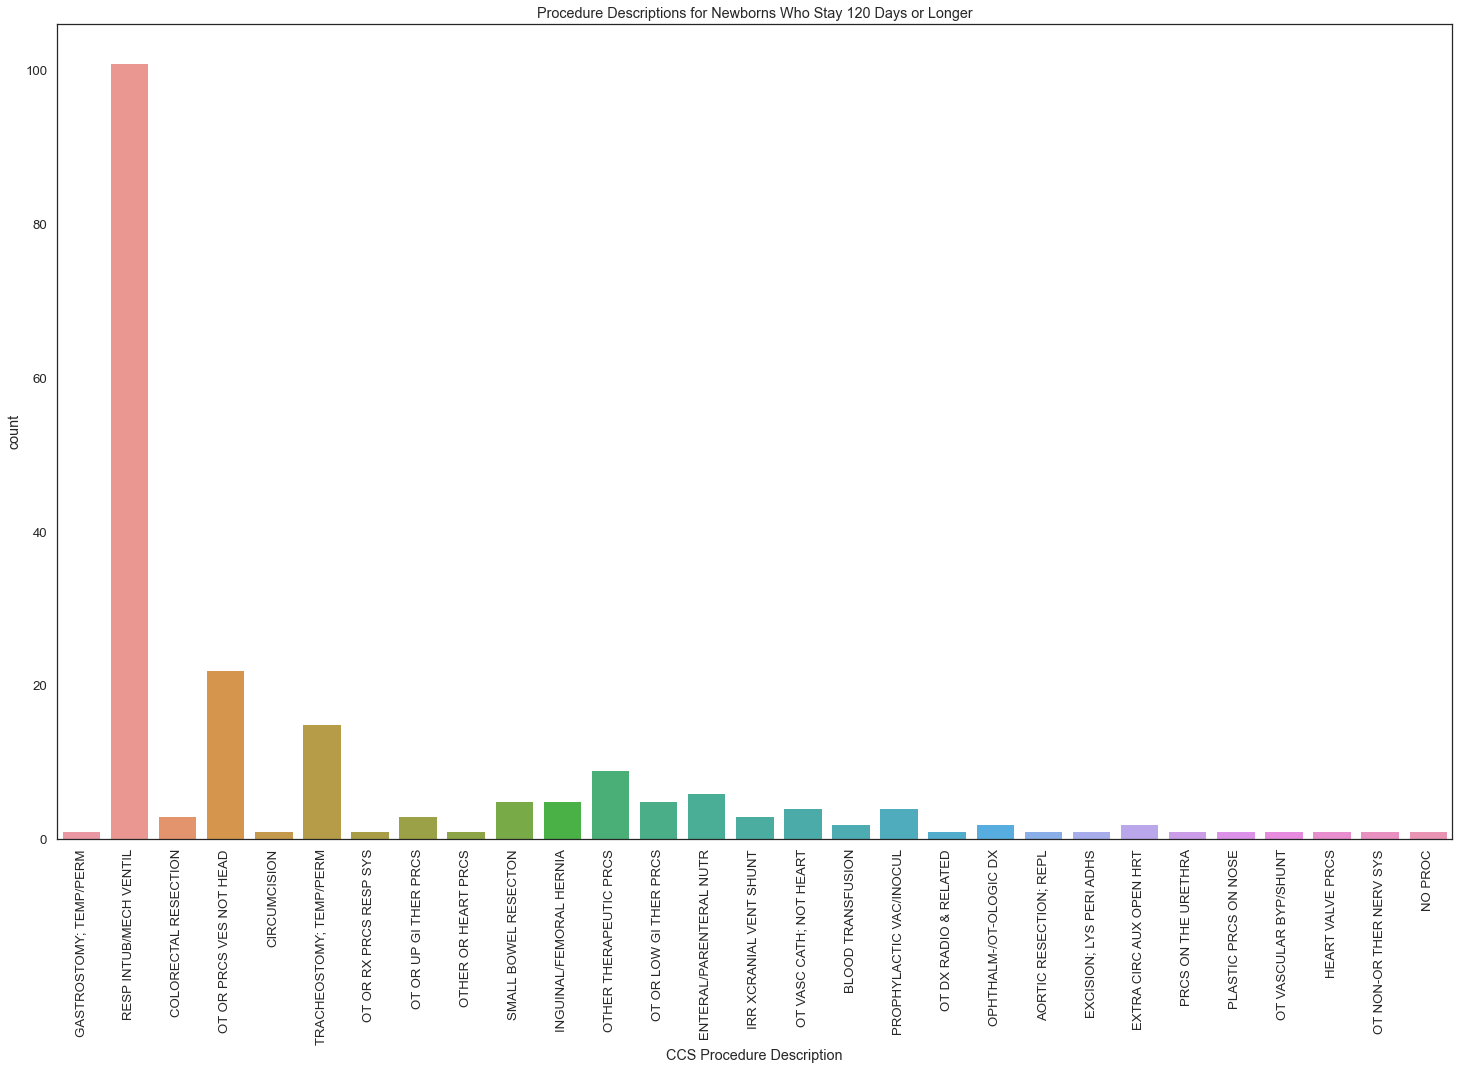

In [207]:
f, ax = plt.subplots(figsize=(25, 15))
sns.countplot(x='CCS Procedure Description', data = longest_newborn_df)
plt.xticks(rotation=90)
plt.title('Procedure Descriptions for Newborns Who Stay 120 Days or Longer')
plt.show()

Most of the babies in this group required a ventilator. This may imply that if a baby requires to be put on a ventilator and is having respiratory issues, there is a high probability that they will have a long stay at the hospital (120+ days)

<AxesSubplot:xlabel='Gender', ylabel='Length of Stay'>

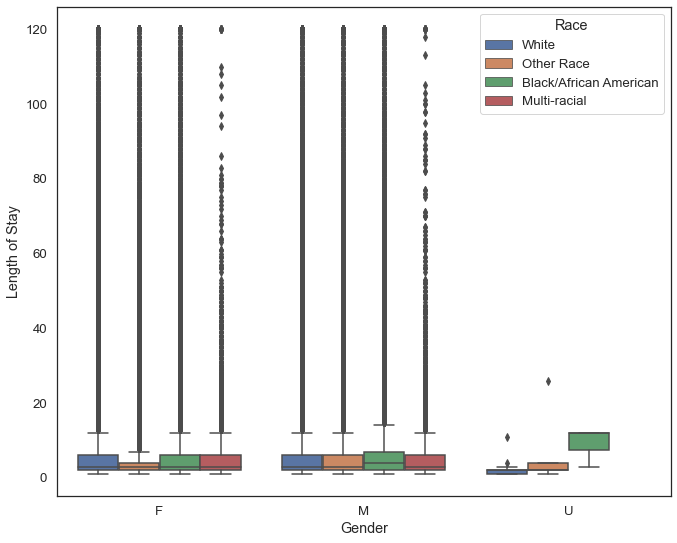

In [208]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Gender", y="Length of Stay", hue="Race", data=hdf)

We can see the length of stay data is very skewed across all genders and races, which makes it difficult to see relationships. I will limit the range of the y axis from now on in order to more clearly see all underlying distributions

[(0.0, 30.0)]

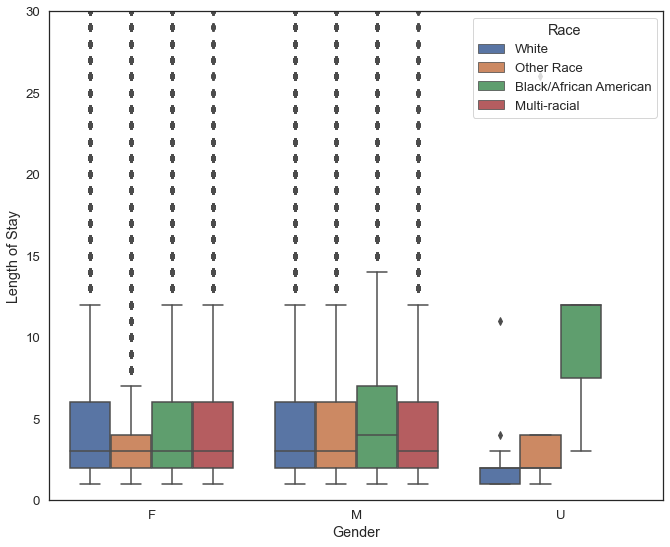

In [209]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Gender", y="Length of Stay", hue="Race", data=hdf)
ax.set(ylim=(0, 30))

[(0.0, 30.0)]

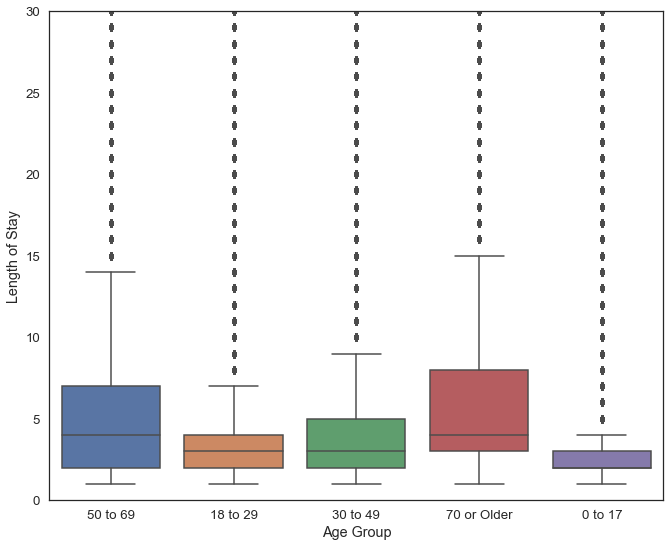

In [210]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Age Group", y="Length of Stay", data=hdf)
ax.set(ylim=(0, 30))

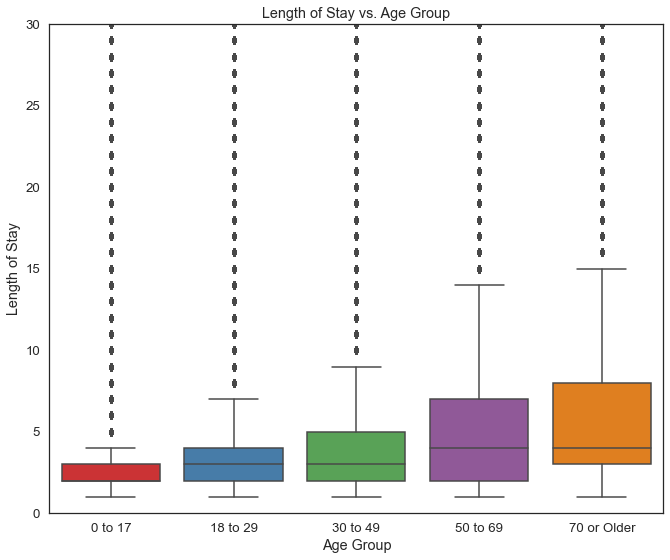

In [211]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Age Group", y="Length of Stay", order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'],palette="Set1", data=hdf)
ax.set(ylim=(0, 30))
plt.title('Length of Stay vs. Age Group')
plt.show()

Here, we can see some significant variance in length of stay across different age groups. It is evident that age groups 50-69 and 70 or older tend to have the longest stay distributions

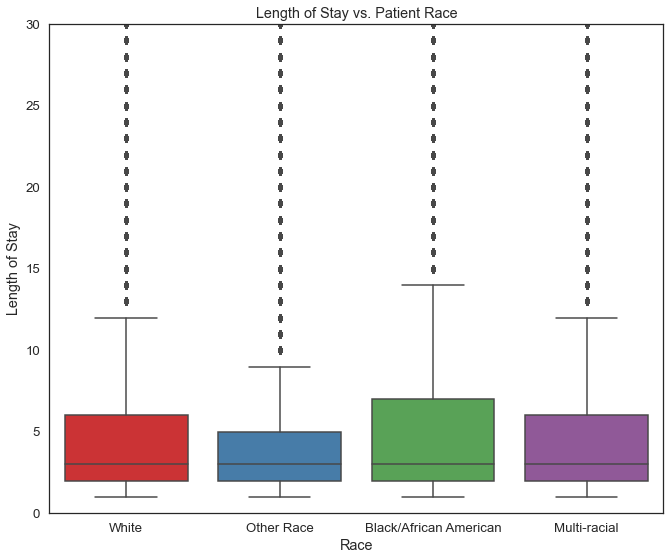

In [212]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Race", y="Length of Stay", data=hdf, palette='Set1')
plt.title('Length of Stay vs. Patient Race')
ax.set(ylim=(0, 30))
plt.show()

What is the average length of stay for each diagnosis description in the dataset?

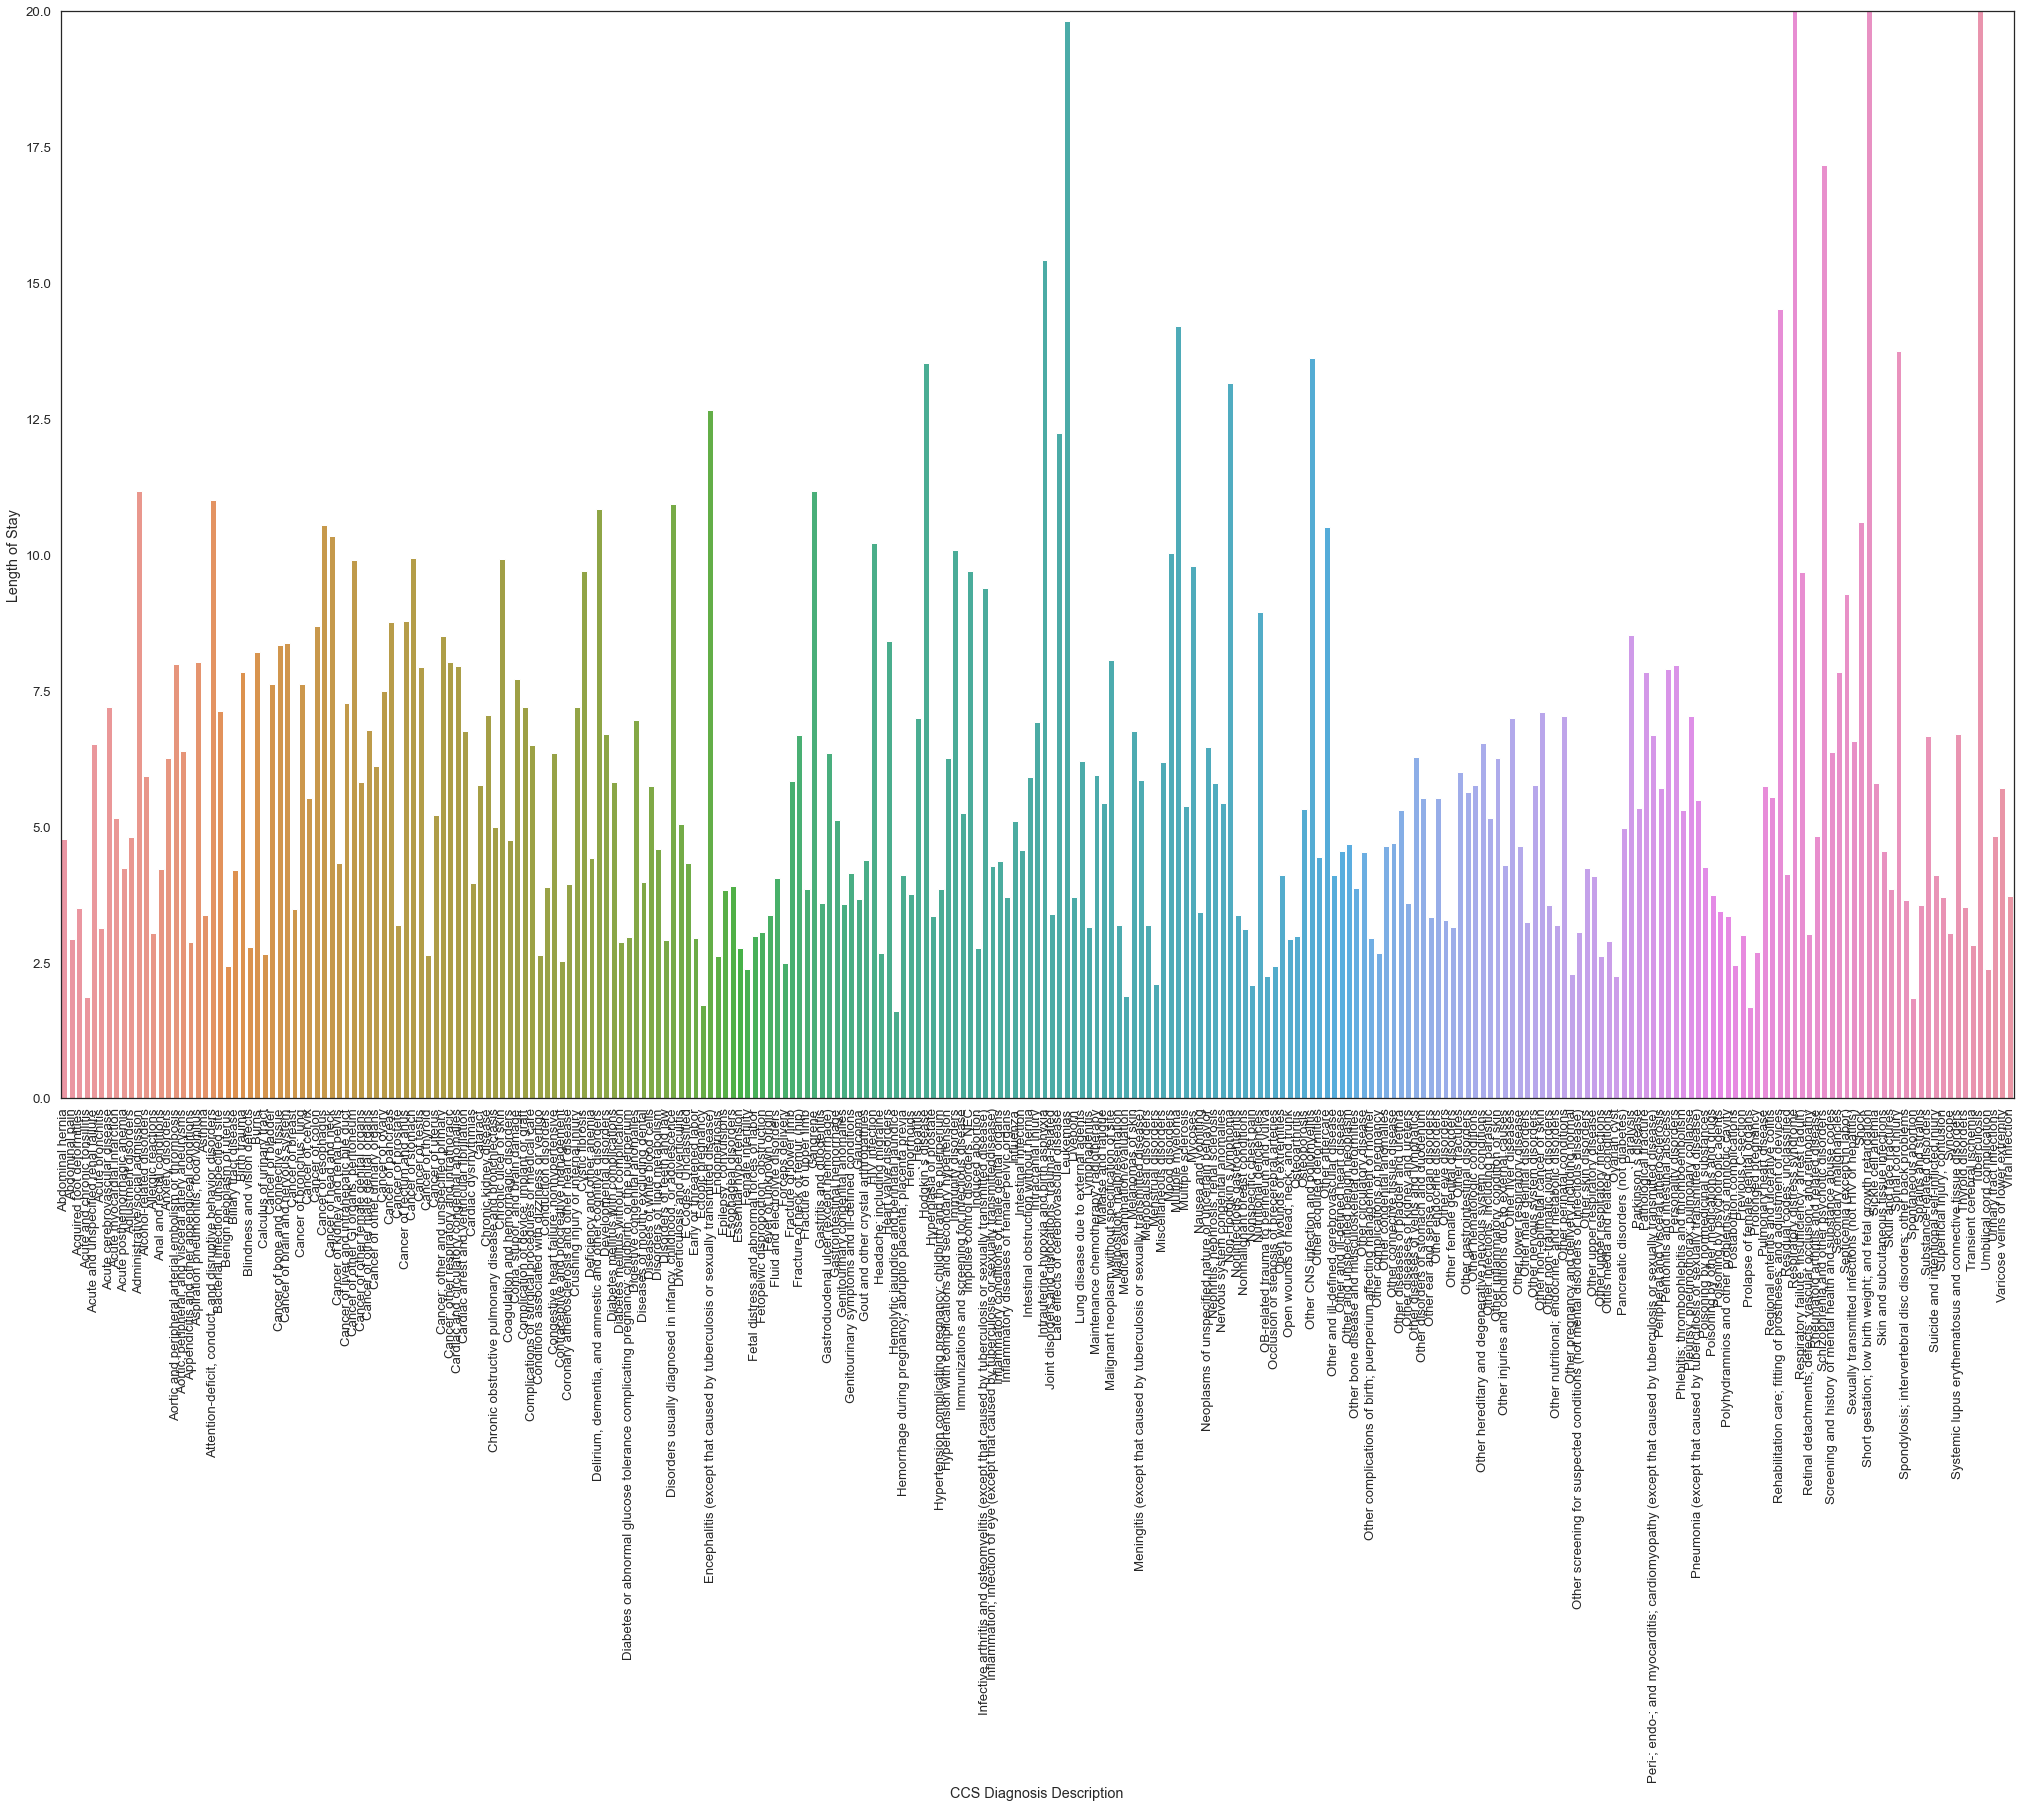

In [213]:
f, ax = plt.subplots(figsize=(35, 20))
sns.barplot(x="CCS Diagnosis Description", y="Length of Stay", data=hdf[['CCS Diagnosis Description','Length of Stay']].groupby('CCS Diagnosis Description', as_index=False).mean())
ax.set(ylim=(0, 20))
plt.xticks(rotation=90)
plt.show()

This plot makes it nice to visualize the spread of length of stay values for different diagnoses, but there are a lot of categories which makes it difficult to read. 

Let's create a dataframe and list diagnoses in descending order of average length of stay to see the diagnosis descriptions that have the longest length of stay.

In [214]:
diag_stay_df = hdf[['CCS Diagnosis Description','Length of Stay']].groupby('CCS Diagnosis Description', as_index=False).mean()
diag_stay_df = diag_stay_df.sort_values(by='Length of Stay', ascending=False, ignore_index=True)
display(diag_stay_df)

,CCS Diagnosis Description,Length of Stay
0,Short gestation; low birth weight; and fetal g...,31.591017
1,Respiratory distress syndrome,23.727660
2,Tuberculosis,21.489237
3,Leukemias,19.822296
4,Schizophrenia and other psychotic disorders,17.168233
...,...,...
258,Acute and chronic tonsillitis,1.870309
259,Spontaneous abortion,1.851351
260,Ectopic pregnancy,1.705751
261,Prolapse of female genital organs,1.683635


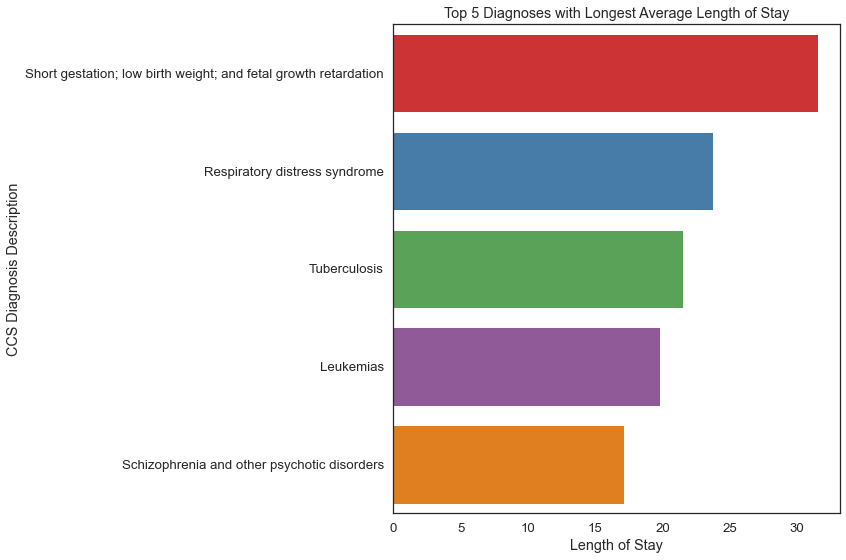

In [215]:
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))
sns.barplot(y="CCS Diagnosis Description", x="Length of Stay", data=diag_stay_df[0:5], palette='Set1')
plt.title('Top 5 Diagnoses with Longest Average Length of Stay')
plt.show()

Let's see which diagnosis descriptions cost the hospital the most money

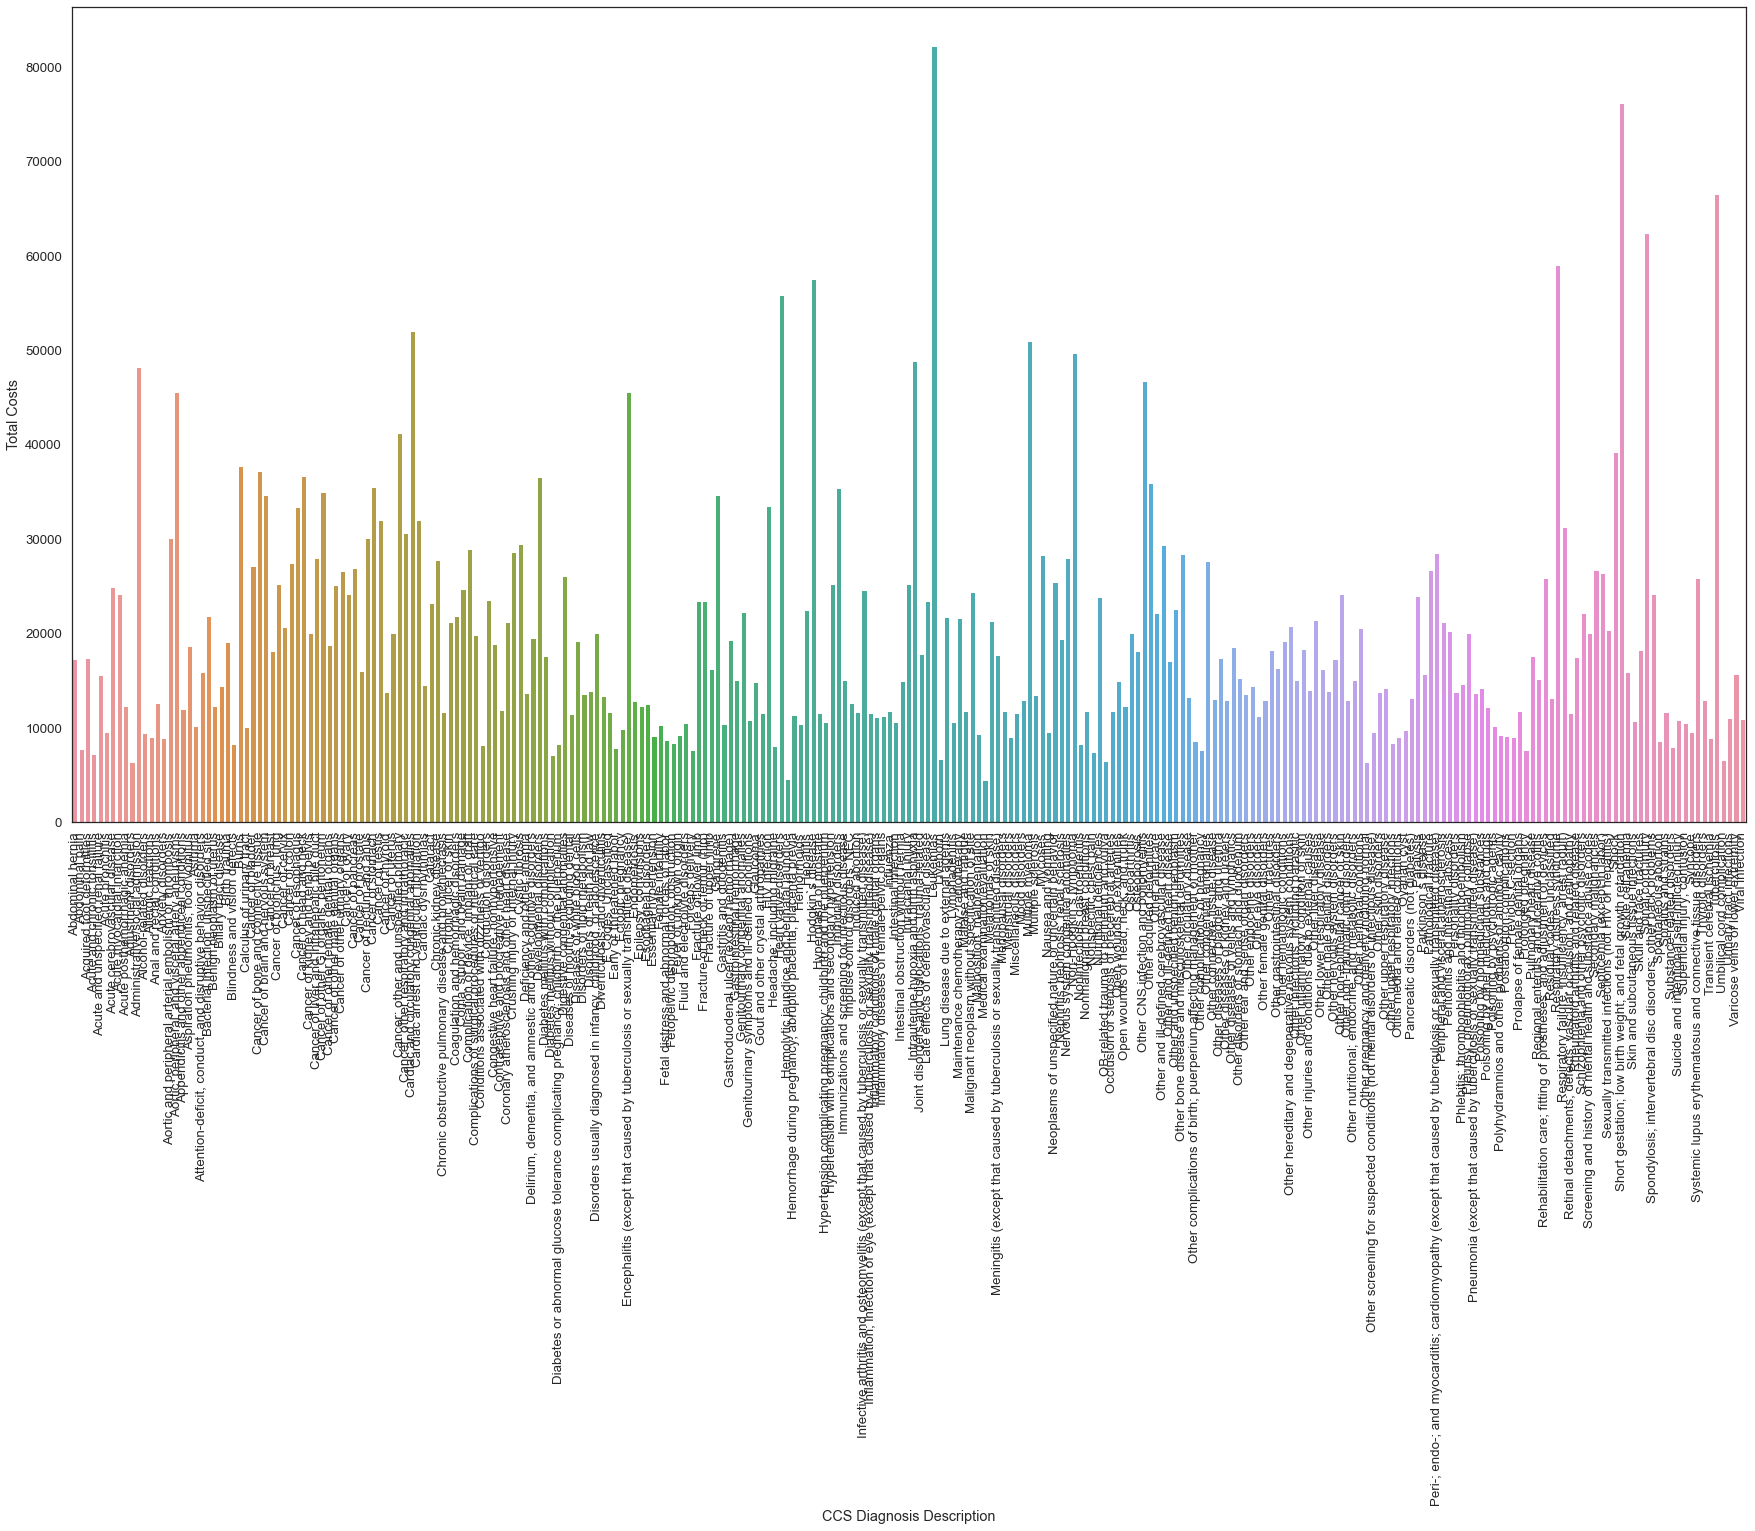

In [216]:
f, ax = plt.subplots(figsize=(30, 15))
sns.barplot(x="CCS Diagnosis Description", y="Total Costs", data=hdf[['CCS Diagnosis Description','Total Costs']].groupby('CCS Diagnosis Description', as_index=False).mean())
plt.xticks(rotation=90)
plt.show()

Again, this plot is hard to read so lets print out a dataframe with the rows listed in descending order of cost

In [217]:
diag_costs_df = hdf[['CCS Diagnosis Description','Total Costs']].groupby('CCS Diagnosis Description', as_index=False).mean()
diag_costs_df = diag_costs_df.sort_values(by='Total Costs', ascending=False, ignore_index=True)
display(diag_costs_df)

,CCS Diagnosis Description,Total Costs
0,Leukemias,82255.539414
1,Short gestation; low birth weight; and fetal g...,76227.177045
2,Tuberculosis,66563.343562
3,Spinal cord injury,62398.305067
4,Respiratory distress syndrome,59006.072000
...,...,...
258,OB-related trauma to perineum and vulva,6491.679341
259,Other pregnancy and delivery including normal,6419.875510
260,Adjustment disorders,6325.364765
261,Hemolytic jaundice and perinatal jaundice,4596.355803


Next, through the use of an inner join, let's see how the diagnosis descriptions that cost the most compare with their length of stay

In [218]:
diag_costs_df = diag_costs_df.reset_index()
joined_df = diag_stay_df.merge(right=diag_costs_df, how='inner', on='CCS Diagnosis Description')
display(joined_df)

,CCS Diagnosis Description,Length of Stay,index,Total Costs
0,Short gestation; low birth weight; and fetal g...,31.591017,1,76227.177045
1,Respiratory distress syndrome,23.727660,4,59006.072000
2,Tuberculosis,21.489237,2,66563.343562
3,Leukemias,19.822296,0,82255.539414
4,Schizophrenia and other psychotic disorders,17.168233,80,22106.462457
...,...,...,...,...
258,Acute and chronic tonsillitis,1.870309,254,7233.839857
259,Spontaneous abortion,1.851351,239,8594.514324
260,Ectopic pregnancy,1.705751,219,9876.683682
261,Prolapse of female genital organs,1.683635,186,11742.817702


We can see that there is definitely a strong relationship between the most expensive diagnoses and a longer inpatient length of stay. However, for example, the diagnosis description with the second longest average length of stay is only the fifth most expensive to the hospital

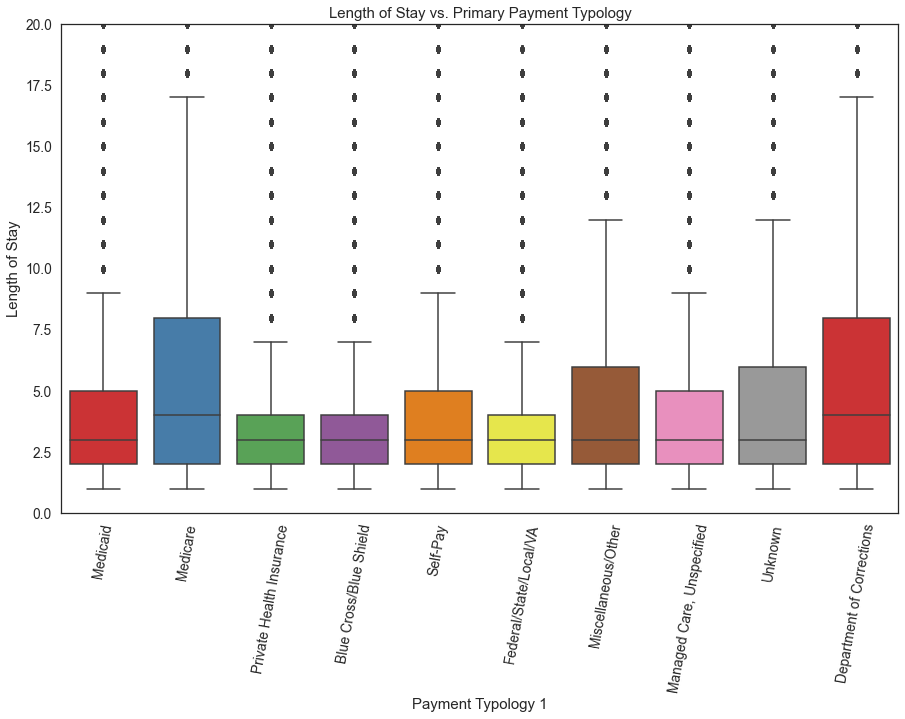

In [219]:
sns.set(font_scale=1.25)
sns.set_style("white")
f, ax = plt.subplots(figsize=(15, 9))
sns.boxplot(x="Payment Typology 1", y="Length of Stay", data=hdf, palette='Set1')
ax.set(ylim=(0, 20))
plt.xticks(rotation=80)
plt.title('Length of Stay vs. Primary Payment Typology')
plt.show()

Here, we see another feature that has a significant amount of variance in length of stay across its categories. Medicare patients tend to have one of the longest length of stays. 

This may be because most medicare patients are in an older age bracket. Let's see if we can visually support this hypothesis

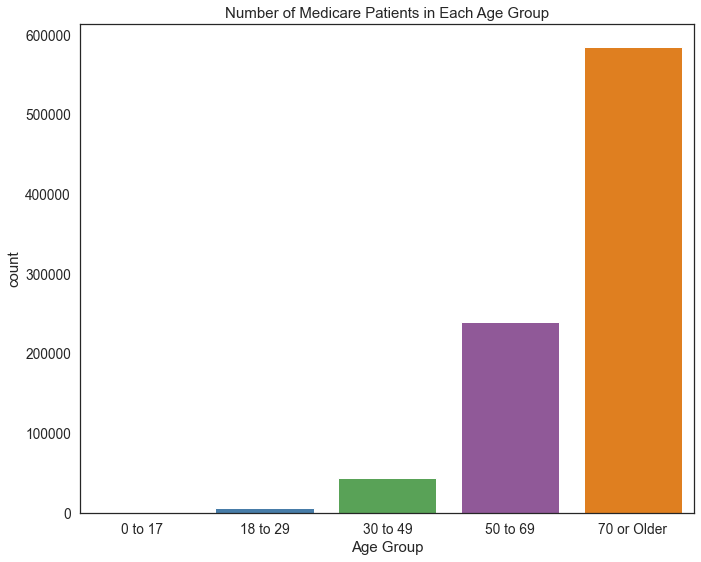

In [220]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x='Age Group', data = hdf[hdf['Payment Typology 1']=='Medicare'], order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'], palette='Set1')
plt.title('Number of Medicare Patients in Each Age Group')
plt.show()

This hypothesis is supported by the graph above. Age/Payment typology seem to be correlated in some ways, and these seem like they have an effect on the length of stay of the patient

Next, let's take a look at how length of stay varies across different patient zip code areas

[(0.0, 20.0)]

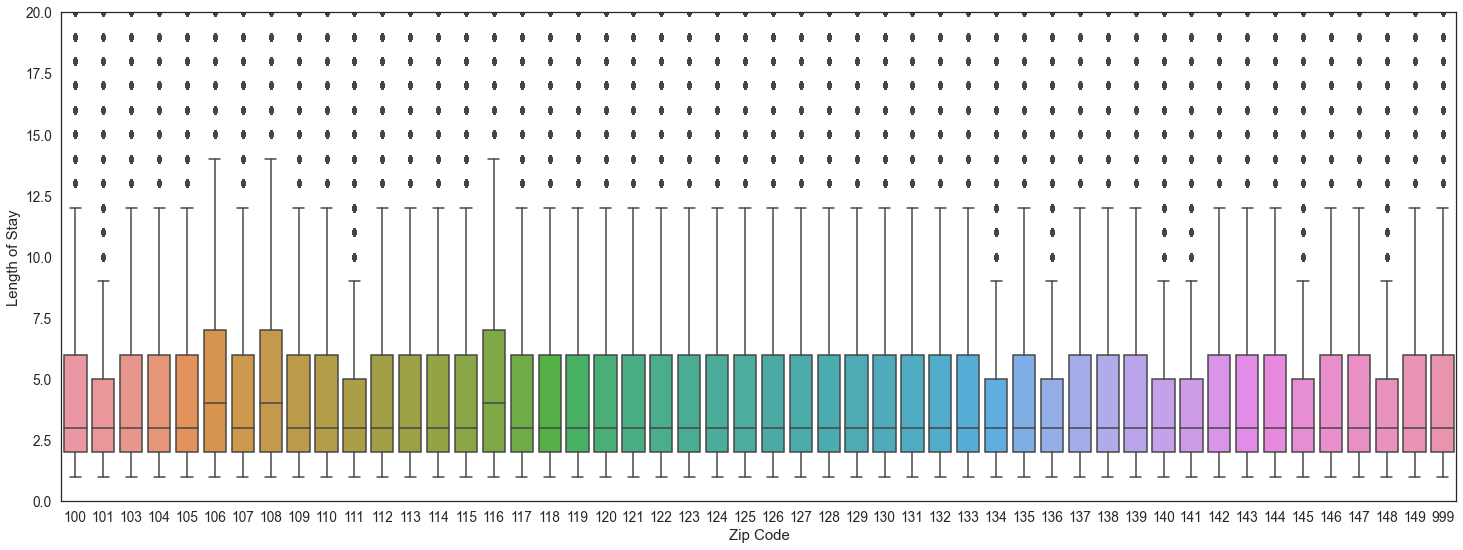

In [221]:
f, ax = plt.subplots(figsize=(25, 9))
sns.boxplot(x="Zip Code", y="Length of Stay", data=hdf)
ax.set(ylim=(0, 20))

We can see that there is not a huge amount of variation in length of stay across the zipcodes, thus the zipcode doesn't add much value to the study directly.

Lets analyse more of the features.

Lets check how health service area varies with length of stay

[(0.0, 20.0)]

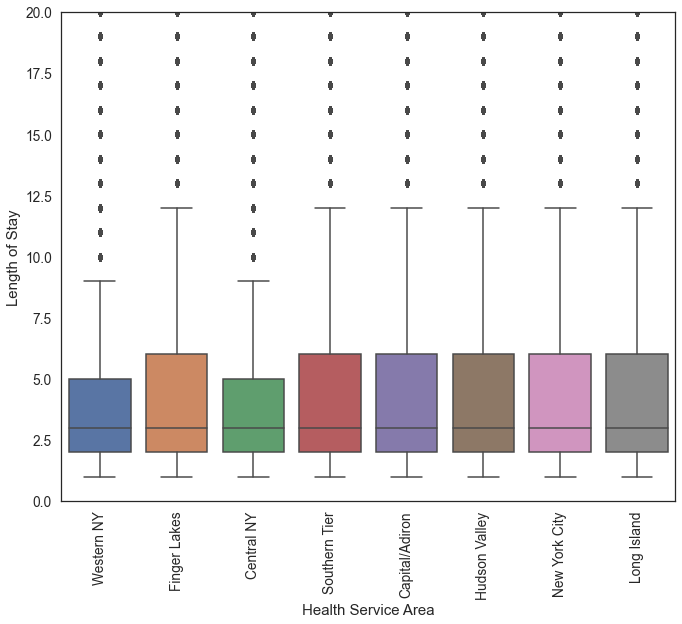

In [222]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Health Service Area", y="Length of Stay",data=hdf)
plt.xticks(rotation=90)
ax.set(ylim=(0, 20))

We try to analyse how the Severity of illness affects Length of Stay

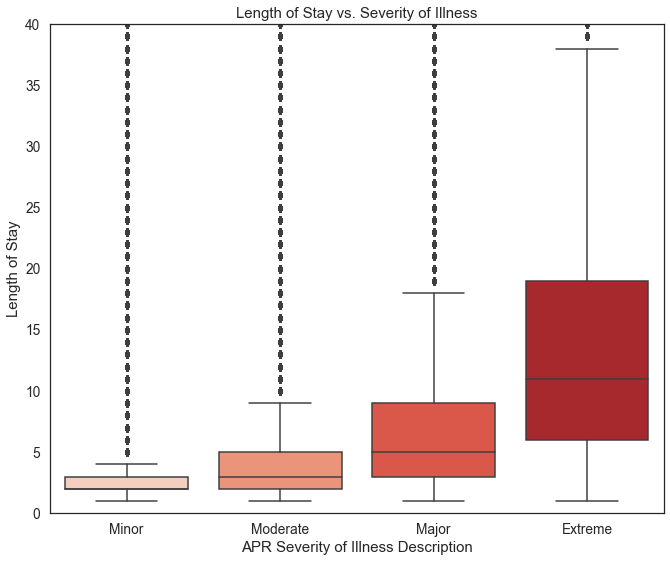

In [223]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="APR Severity of Illness Description", y="Length of Stay",data=hdf, palette='Reds')
ax.set(ylim=(0, 40))
plt.title('Length of Stay vs. Severity of Illness')
plt.show()

There is high amounts of variance in length of stay against the severity of illness feature. This will be an important feature to include in the model and will improve its predictive ability

We tried to analyse how the ethinicity affects the length of stay.

[(0.0, 20.0)]

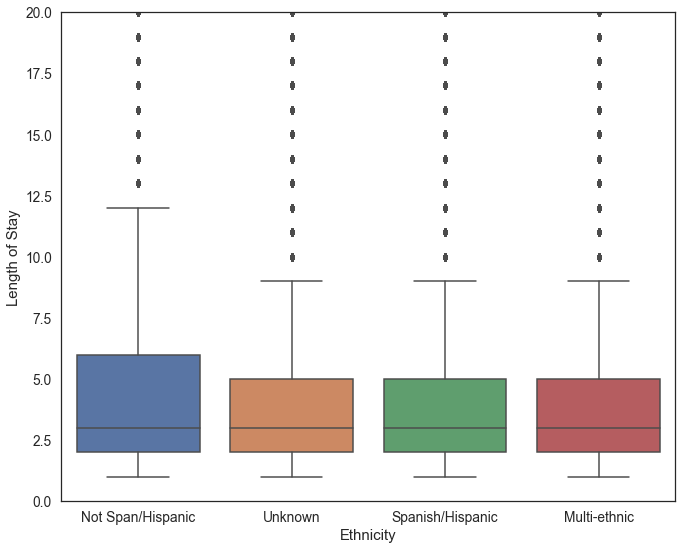

In [224]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Ethnicity", y="Length of Stay",data=hdf)
ax.set(ylim=(0, 20))

Here we can see the ethnicity column encodes less information then the Race column and does not have much variance across different ethnicities, so we will drop it later.

We tried to analyse how the type of admission impacts the length of stay.

[(0.0, 20.0)]

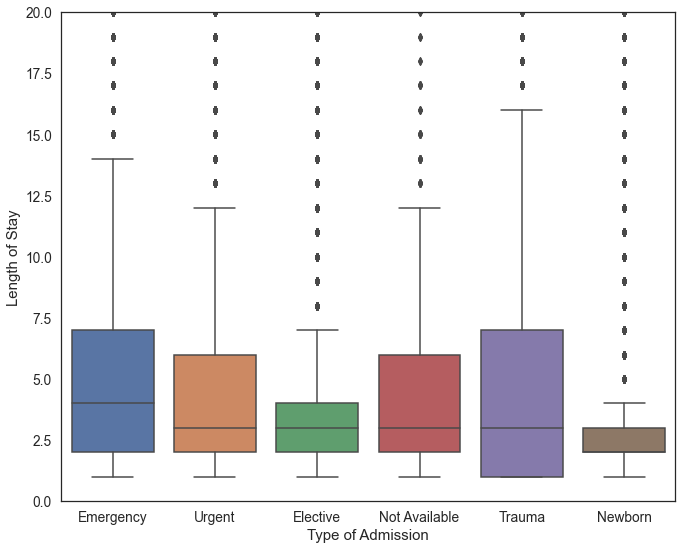

In [225]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Type of Admission", y="Length of Stay", data=hdf)
ax.set(ylim=(0, 20))

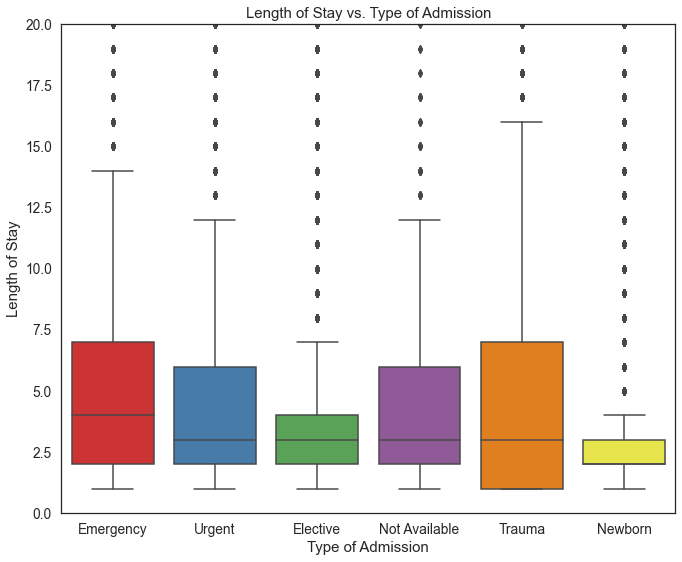

In [226]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Type of Admission", y="Length of Stay",data=hdf, palette='Set1')
plt.title('Length of Stay vs. Type of Admission')
ax.set(ylim=(0, 20))
plt.show()

We can see that trauma, Urgent, Elective and Emergency type of admissions are significant.

Let's visualize the positive linear relationship between length of stay and total costs,

<AxesSubplot:xlabel='Length of Stay', ylabel='Total Costs'>

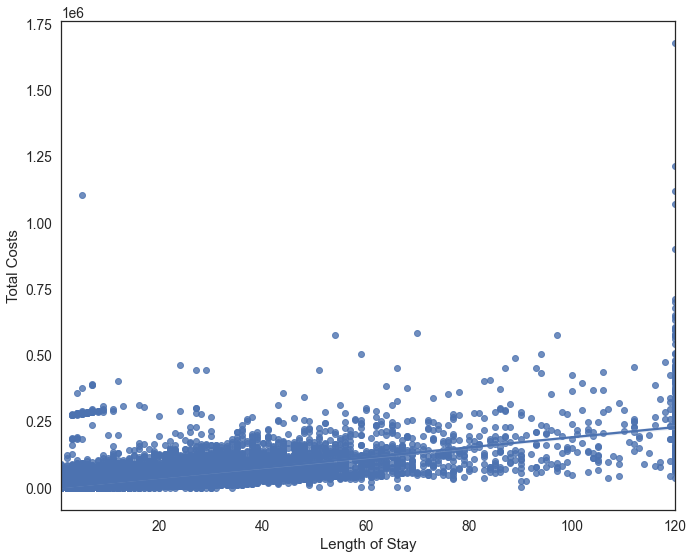

In [227]:
f, ax = plt.subplots(figsize=(11, 9))
sns.regplot(x="Length of Stay", y="Total Costs", data=hdf[0:200000])

Let's try plot the frequency of severity of illness for all patients who stay for 120 days or longer

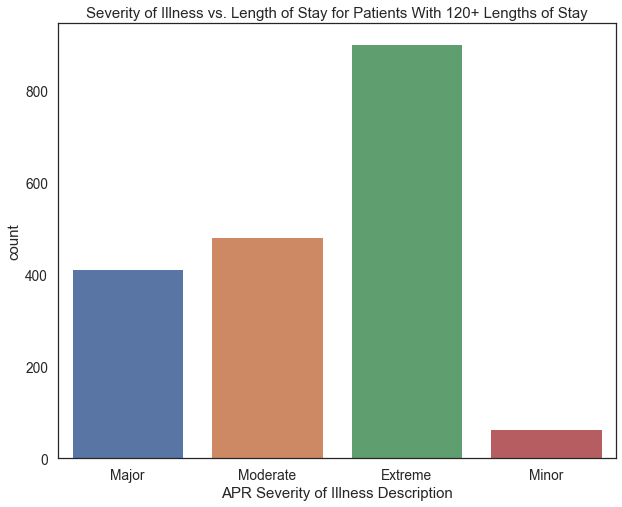

In [228]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='APR Severity of Illness Description', data = hdf[hdf['Length of Stay']==120])
plt.title('Severity of Illness vs. Length of Stay for Patients With 120+ Lengths of Stay')
plt.show()

We can see that of the approximately 1900 patients who have stays of 120 days or longer, most of them were extreme illnesses, which makes sense

-------------------
-------------------

From the visualisations we can infere and conclude the columns to dropped which won't help our model to predict the length of stay.

So we drop Zip Code, Facility Name, CCS Diagnosis Description, CCS Procedure Description, APR DRG Description, APR MDC Description, Discharge Year, Operating Certificate Number, Ethnicity, Hospital County, Birth Weight, Attending Provider License Number, Patient Disposition.

In [229]:
hdf = hdf.drop(['Zip Code'], axis=1)
hdf = hdf.drop(['Facility Name'], axis=1)
hdf = hdf.drop(['CCS Diagnosis Description'], axis=1)
hdf = hdf.drop(['CCS Procedure Description'], axis=1)
hdf = hdf.drop(['APR DRG Description'], axis=1)
hdf = hdf.drop(['APR MDC Description'], axis=1)
hdf = hdf.drop(['Discharge Year'], axis=1)   
hdf = hdf.drop(['Operating Certificate Number'], axis=1) 
hdf = hdf.drop(['Ethnicity'], axis=1) 
hdf = hdf.drop(['Hospital County'], axis=1) 
hdf = hdf.drop(['Birth Weight'], axis=1)
hdf = hdf.drop(['Attending Provider License Number'], axis=1) 
hdf = hdf.drop(['Patient Disposition'], axis=1)

# Feature Encoding

Now we try to format our dataframe for modeling. However, for the data cleaning process, we converted a few columns that represent categorical features into numerical values to facilitate some processes. Now, these must be converted back to categorical columns.

In [230]:
hdf.dtypes

Health Service Area                     object
Facility Id                            float64
Age Group                               object
Gender                                  object
Race                                    object
Length of Stay                           int64
Type of Admission                       object
CCS Diagnosis Code                       int64
CCS Procedure Code                       int64
APR DRG Code                             int64
APR MDC Code                             int64
APR Severity of Illness Code             int64
APR Severity of Illness Description     object
APR Risk of Mortality                   object
APR Medical Surgical Description        object
Payment Typology 1                      object
Abortion Edit Indicator                 object
Emergency Department Indicator          object
Total Charges                          float64
Total Costs                            float64
dtype: object

In [231]:
mort_index = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}
age_index = {'0 to 17': 1, '18 to 29': 2, '30 to 49': 3, '50 to 69': 4, '70 or Older': 5}

hdf['Age Group'] = hdf['Age Group'].apply(lambda x: age_index[x])
hdf['APR Risk of Mortality'] = hdf['APR Risk of Mortality'].apply(lambda x: mort_index[x])
display(hdf)

,Health Service Area,Facility Id,Age Group,Gender,Race,Length of Stay,Type of Admission,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,66.0,4,F,White,5,Emergency,657,0,753,19,1,Minor,1,Medical,Medicaid,N,Y,5620.00,4561.28
1,Western NY,66.0,2,F,White,8,Emergency,657,0,753,19,2,Moderate,1,Medical,Medicaid,N,Y,7404.18,6933.94
2,Western NY,66.0,3,M,White,8,Emergency,657,0,753,19,1,Minor,1,Medical,Medicaid,N,Y,7931.28,7154.85
3,Western NY,66.0,4,F,White,4,Emergency,128,0,141,4,1,Minor,1,Medical,Medicare,N,Y,11304.44,4584.11
4,Western NY,103.0,4,M,White,3,Emergency,83,0,53,1,2,Moderate,2,Medical,Medicaid,N,Y,8330.50,4361.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346755,Long Island,943.0,5,M,White,2,Emergency,112,0,47,1,2,Moderate,2,Medical,Medicare,N,Y,43494.00,6637.09
2346756,Long Island,943.0,4,M,White,1,Emergency,54,159,351,8,1,Minor,1,Medical,Private Health Insurance,N,Y,16662.00,3236.18
2346757,Long Island,943.0,4,M,White,2,Urgent,657,0,751,19,1,Minor,1,Medical,Medicaid,N,N,7142.00,1862.39
2346758,Long Island,943.0,5,M,White,1,Emergency,106,0,201,5,1,Minor,2,Medical,Medicare,N,Y,13070.00,2744.13


# Build Models

In [232]:
import findspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql.types import DoubleType

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StandardScaler, StringIndexer, VectorAssembler, PCA
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.regression import LabeledPoint
from pyspark.ml.linalg import VectorUDT
from pyspark.sql.types import StructType, StructField

from sklearn.metrics import classification_report, confusion_matrix

#### Start a spark Session

In [233]:
config = SparkConf().setAll([('spark.executor.memory', '8g'),('spark.sql.debug.maxToStringFields', '1000'), ('spark.executor.cores', '3'), ('spark.cores.max', '3'), ('spark.driver.memory','8g'),('spark.ui.port', '4051')])
spark = SparkSession.builder\
        .master("local")\
        .appName("LOS Prediction")\
        .config(conf=config)\
        .getOrCreate()
sqlContext = SQLContext(spark)
spark

#### We use function to convert pandas dataframe to spark datafram without typecasting

In [234]:
def equivalent_type(f):
    if f == 'datetime64[ns]': return TimestampType()
    elif f == 'int64': return LongType()
    elif f == 'int32': return IntegerType()
    elif f == 'float64': return FloatType()
    else: return StringType()

def define_structure(string, format_type):
    try: typo = equivalent_type(format_type)
    except: typo = StringType()
    return StructField(string, typo)

#Given pandas dataframe, it will return a spark's dataframe.
def pandas_to_spark(pandas_df):
    columns = list(pandas_df.columns)
    types = list(pandas_df.dtypes)
    struct_list = []
    for column, typo in zip(columns, types): 
      struct_list.append(define_structure(column, typo))
    p_schema = StructType(struct_list)
    return sqlContext.createDataFrame(pandas_df, p_schema)

dfs = pandas_to_spark(hdf)

In [235]:
pd.DataFrame(dfs.head(10),columns=dfs.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
Health Service Area,Western NY,Western NY,Western NY,Western NY,Western NY,Western NY,Western NY,Western NY,Western NY,Western NY
Facility Id,66.0,66.0,66.0,66.0,103.0,207.0,207.0,207.0,207.0,207.0
Age Group,4,2,3,4,4,4,5,4,5,4
Gender,F,F,M,F,M,F,F,M,M,M
Race,White,White,White,White,White,White,White,White,White,White
Length of Stay,5,8,8,4,3,2,2,9,8,1
Type of Admission,Emergency,Emergency,Emergency,Emergency,Emergency,Urgent,Urgent,Emergency,Emergency,Emergency
CCS Diagnosis Code,657,657,657,128,83,102,98,123,83,103
CCS Procedure Code,0,0,0,0,0,0,0,0,0,0
APR DRG Code,753,753,753,141,53,203,199,139,53,134


In [236]:
dfs.printSchema()

root
 |-- Health Service Area: string (nullable = true)
 |-- Facility Id: float (nullable = true)
 |-- Age Group: long (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Length of Stay: long (nullable = true)
 |-- Type of Admission: string (nullable = true)
 |-- CCS Diagnosis Code: long (nullable = true)
 |-- CCS Procedure Code: long (nullable = true)
 |-- APR DRG Code: long (nullable = true)
 |-- APR MDC Code: long (nullable = true)
 |-- APR Severity of Illness Code: long (nullable = true)
 |-- APR Severity of Illness Description: string (nullable = true)
 |-- APR Risk of Mortality: long (nullable = true)
 |-- APR Medical Surgical Description: string (nullable = true)
 |-- Payment Typology 1: string (nullable = true)
 |-- Abortion Edit Indicator: string (nullable = true)
 |-- Emergency Department Indicator: string (nullable = true)
 |-- Total Charges: float (nullable = true)
 |-- Total Costs: float (nullable = true)



The dataframe has column names with space, which is not read by the pyspark functions. So we replace it with '_'

In [237]:
dfsp = dfs.select([F.col(col).alias(col.replace(' ', '_')) for col in dfs.columns])
dfsp.printSchema()

root
 |-- Health_Service_Area: string (nullable = true)
 |-- Facility_Id: float (nullable = true)
 |-- Age_Group: long (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Length_of_Stay: long (nullable = true)
 |-- Type_of_Admission: string (nullable = true)
 |-- CCS_Diagnosis_Code: long (nullable = true)
 |-- CCS_Procedure_Code: long (nullable = true)
 |-- APR_DRG_Code: long (nullable = true)
 |-- APR_MDC_Code: long (nullable = true)
 |-- APR_Severity_of_Illness_Code: long (nullable = true)
 |-- APR_Severity_of_Illness_Description: string (nullable = true)
 |-- APR_Risk_of_Mortality: long (nullable = true)
 |-- APR_Medical_Surgical_Description: string (nullable = true)
 |-- Payment_Typology_1: string (nullable = true)
 |-- Abortion_Edit_Indicator: string (nullable = true)
 |-- Emergency_Department_Indicator: string (nullable = true)
 |-- Total_Charges: float (nullable = true)
 |-- Total_Costs: float (nullable = true)



Our dataframe has multiple datatypes, which isn't best for analysis in spark. So we index the string columns using StringIndexer feature in pyspark library.

In [238]:
categorical_columns = ['Health_Service_Area',
                       'Gender','Race','Type_of_Admission',
                       'APR_Severity_of_Illness_Description',
                       'APR_Medical_Surgical_Description',
                       'Payment_Typology_1',
                       'Abortion_Edit_Indicator',
                       'Emergency_Department_Indicator']
indexers = [StringIndexer(inputCol=column, outputCol=column+"_").fit(dfsp) \
            for column in categorical_columns ]
pipeline = Pipeline(stages=indexers)
dfsp = pipeline.fit(dfsp).transform(dfsp)

pd.DataFrame(dfsp.show(10),columns=dfsp.columns).transpose()

+-------------------+-----------+---------+------+-----+--------------+-----------------+------------------+------------------+------------+------------+----------------------------+-----------------------------------+---------------------+--------------------------------+------------------+-----------------------+------------------------------+-------------+-----------+--------------------+-------+-----+------------------+------------------------------------+---------------------------------+-------------------+------------------------+-------------------------------+
|Health_Service_Area|Facility_Id|Age_Group|Gender| Race|Length_of_Stay|Type_of_Admission|CCS_Diagnosis_Code|CCS_Procedure_Code|APR_DRG_Code|APR_MDC_Code|APR_Severity_of_Illness_Code|APR_Severity_of_Illness_Description|APR_Risk_of_Mortality|APR_Medical_Surgical_Description|Payment_Typology_1|Abortion_Edit_Indicator|Emergency_Department_Indicator|Total_Charges|Total_Costs|Health_Service_Area_|Gender_|Race_|Type_of_Admissio

""
Health_Service_Area
Facility_Id
Age_Group
Gender
Race
Length_of_Stay
Type_of_Admission
CCS_Diagnosis_Code
CCS_Procedure_Code
APR_DRG_Code


In [239]:
dfsp = dfsp.drop(dfsp.Health_Service_Area)
dfsp = dfsp.drop(dfsp.Gender)
dfsp = dfsp.drop(dfsp.Race)
dfsp = dfsp.drop(dfsp.Type_of_Admission)
dfsp = dfsp.drop(dfsp.APR_Severity_of_Illness_Description)
dfsp = dfsp.drop(dfsp.APR_Medical_Surgical_Description)
dfsp = dfsp.drop(dfsp.Payment_Typology_1)
dfsp = dfsp.drop(dfsp.Abortion_Edit_Indicator)
dfsp = dfsp.drop(dfsp.Emergency_Department_Indicator)

In [240]:
dfsp.printSchema()

root
 |-- Facility_Id: float (nullable = true)
 |-- Age_Group: long (nullable = true)
 |-- Length_of_Stay: long (nullable = true)
 |-- CCS_Diagnosis_Code: long (nullable = true)
 |-- CCS_Procedure_Code: long (nullable = true)
 |-- APR_DRG_Code: long (nullable = true)
 |-- APR_MDC_Code: long (nullable = true)
 |-- APR_Severity_of_Illness_Code: long (nullable = true)
 |-- APR_Risk_of_Mortality: long (nullable = true)
 |-- Total_Charges: float (nullable = true)
 |-- Total_Costs: float (nullable = true)
 |-- Health_Service_Area_: double (nullable = false)
 |-- Gender_: double (nullable = false)
 |-- Race_: double (nullable = false)
 |-- Type_of_Admission_: double (nullable = false)
 |-- APR_Severity_of_Illness_Description_: double (nullable = false)
 |-- APR_Medical_Surgical_Description_: double (nullable = false)
 |-- Payment_Typology_1_: double (nullable = false)
 |-- Abortion_Edit_Indicator_: double (nullable = false)
 |-- Emergency_Department_Indicator_: double (nullable = false)



the datatypes are different than the indexed columns, so we cast the datatypes to double type

In [241]:
for column in dfsp.columns:
    dfsp= dfsp.withColumn(column, dfsp[column].cast(DoubleType()))

dfsp.printSchema()

root
 |-- Facility_Id: double (nullable = true)
 |-- Age_Group: double (nullable = true)
 |-- Length_of_Stay: double (nullable = true)
 |-- CCS_Diagnosis_Code: double (nullable = true)
 |-- CCS_Procedure_Code: double (nullable = true)
 |-- APR_DRG_Code: double (nullable = true)
 |-- APR_MDC_Code: double (nullable = true)
 |-- APR_Severity_of_Illness_Code: double (nullable = true)
 |-- APR_Risk_of_Mortality: double (nullable = true)
 |-- Total_Charges: double (nullable = true)
 |-- Total_Costs: double (nullable = true)
 |-- Health_Service_Area_: double (nullable = false)
 |-- Gender_: double (nullable = false)
 |-- Race_: double (nullable = false)
 |-- Type_of_Admission_: double (nullable = false)
 |-- APR_Severity_of_Illness_Description_: double (nullable = false)
 |-- APR_Medical_Surgical_Description_: double (nullable = false)
 |-- Payment_Typology_1_: double (nullable = false)
 |-- Abortion_Edit_Indicator_: double (nullable = false)
 |-- Emergency_Department_Indicator_: double (null

Here, we prepare our data for predictive modeling using machine learning methods. 

First, the the training data is separated from the labels by dropping the label column and dropping columns that would not be present at the time of length of stay prediction in a real-world scenario (such as total charges and total costs). 

This effectively eliminates any data leakage from occuring.

In [242]:
columns = dfsp.schema.names
drop_columns = ['Length_of_Stay','Total_Charges','Total_Costs']
feature_columns = [col for col in columns if col not in drop_columns]
feature_columns

['Facility_Id',
 'Age_Group',
 'CCS_Diagnosis_Code',
 'CCS_Procedure_Code',
 'APR_DRG_Code',
 'APR_MDC_Code',
 'APR_Severity_of_Illness_Code',
 'APR_Risk_of_Mortality',
 'Health_Service_Area_',
 'Gender_',
 'Race_',
 'Type_of_Admission_',
 'APR_Severity_of_Illness_Description_',
 'APR_Medical_Surgical_Description_',
 'Payment_Typology_1_',
 'Abortion_Edit_Indicator_',
 'Emergency_Department_Indicator_']


Lets create a vector assembler, input all the feature columns and find all the independent features of individual feature columns

In [243]:
featuresP = VectorAssembler(inputCols = feature_columns,outputCol = 'Independent_Features')
output = featuresP.transform(dfsp)
pd.DataFrame(output.head(10),columns = output.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
Facility_Id,66.0,66.0,66.0,66.0,103.0,207.0,207.0,207.0,207.0,207.0
Age_Group,4.0,2.0,3.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0
Length_of_Stay,5.0,8.0,8.0,4.0,3.0,2.0,2.0,9.0,8.0,1.0
CCS_Diagnosis_Code,657.0,657.0,657.0,128.0,83.0,102.0,98.0,123.0,83.0,103.0
CCS_Procedure_Code,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
APR_DRG_Code,753.0,753.0,753.0,141.0,53.0,203.0,199.0,139.0,53.0,134.0
APR_MDC_Code,19.0,19.0,19.0,4.0,1.0,5.0,5.0,4.0,1.0,4.0
APR_Severity_of_Illness_Code,1.0,2.0,1.0,1.0,2.0,1.0,3.0,3.0,3.0,1.0
APR_Risk_of_Mortality,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,1.0
Total_Charges,5620.0,7404.180176,7931.279785,11304.44043,8330.5,9051.610352,6323.390137,21374.689453,18086.980469,7511.850098


In [244]:
scaler = StandardScaler(inputCol ='Independent_Features',outputCol = 'Scaled_Features',\
                        withStd = True)
scalerModel = scaler.fit(output)
scaled_output = scalerModel.transform(output)
scaled_output.show(10)

+-----------+---------+--------------+------------------+------------------+------------+------------+----------------------------+---------------------+----------------+----------------+--------------------+-------+-----+------------------+------------------------------------+---------------------------------+-------------------+------------------------+-------------------------------+--------------------+--------------------+
|Facility_Id|Age_Group|Length_of_Stay|CCS_Diagnosis_Code|CCS_Procedure_Code|APR_DRG_Code|APR_MDC_Code|APR_Severity_of_Illness_Code|APR_Risk_of_Mortality|   Total_Charges|     Total_Costs|Health_Service_Area_|Gender_|Race_|Type_of_Admission_|APR_Severity_of_Illness_Description_|APR_Medical_Surgical_Description_|Payment_Typology_1_|Abortion_Edit_Indicator_|Emergency_Department_Indicator_|Independent_Features|     Scaled_Features|
+-----------+---------+--------------+------------------+------------------+------------+------------+----------------------------+-----

In [245]:
scaled_output.select('Scaled_Features','Length_of_Stay').show(10)

+--------------------+--------------+
|     Scaled_Features|Length_of_Stay|
+--------------------+--------------+
|(17,[0,1,2,4,5,6,...|           5.0|
|(17,[0,1,2,4,5,6,...|           8.0|
|[0.09249584562201...|           8.0|
|(17,[0,1,2,4,5,6,...|           4.0|
|(17,[0,1,2,4,5,6,...|           3.0|
|[0.29010060672358...|           2.0|
|[0.29010060672358...|           2.0|
|(17,[0,1,2,4,5,6,...|           9.0|
|(17,[0,1,2,4,5,6,...|           8.0|
|[0.29010060672358...|           1.0|
+--------------------+--------------+
only showing top 10 rows



## Dimensionality Reduction

In [258]:
pca = PCA(k=10, inputCol = scaler.getOutputCol(), outputCol='pcaFeatures')
pcaM = pca.fit(scaled_output)
pca_data = pcaM.transform(scaled_output).select('pcaFeatures','Length_of_Stay')

#### Split Train and Test Data

In [259]:
final_data = pca_data.select('pcaFeatures','Length_of_Stay')
train_data, test_data = final_data.randomSplit([0.70,0.30])

In [260]:
train_data.show(10)

+--------------------+--------------+
|         pcaFeatures|Length_of_Stay|
+--------------------+--------------+
|[-4.8674298810703...|          41.0|
|[-4.8233427345376...|          28.0|
|[-4.7822002424829...|           7.0|
|[-4.7573173500131...|          25.0|
|[-4.7502433476011...|           3.0|
|[-4.7463797106497...|          29.0|
|[-4.6917771118933...|          28.0|
|[-4.6808394725299...|          14.0|
|[-4.6804373642191...|          28.0|
|[-4.6755815663439...|          16.0|
+--------------------+--------------+
only showing top 10 rows



## Logisitic Regression


Build the logistic regression model

In [261]:
LogReg = LogisticRegression(featuresCol='pcaFeatures', labelCol='Length_of_Stay')
LogRegModel = LogReg.fit(train_data)
LogRegModel

LogisticRegressionModel: uid=LogisticRegression_c0a0dd3dda6e, numClasses=121, numFeatures=10

In [262]:
LogReg_prediction = LogRegModel.transform(test_data)
pd.DataFrame(LogReg_prediction.head(10),columns = LogReg_prediction.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
pcaFeatures,"[-4.755496112931889, -6.3952291392420975, -3.4...","[-4.746379710649748, -6.216504088466825, -2.54...","[-4.743650993733627, -6.212744724495261, -2.55...","[-4.631252026683059, -6.427671622759313, -3.44...","[-4.619406907484798, -6.245187208012476, -2.58...","[-4.570578091566352, -6.711374661296922, -3.62...","[-4.545030692296281, -4.120149193467686, 3.637...","[-4.539238291736294, -4.13438491364406, 1.4945...","[-4.5269132784637724, -6.618985760204203, -3.4...","[-4.506801544565951, -6.370812409442919, -2.22..."
Length_of_Stay,7.0,28.0,4.0,14.0,41.0,25.0,2.0,7.0,24.0,29.0
rawPrediction,"[-6.112369568068209, 4.72286092600196, 6.26691...","[-6.1147016915120735, 4.938394707554011, 6.191...","[-6.114690539396147, 4.939883994531264, 6.1913...","[-6.112665305604814, 4.707995987434402, 6.1953...","[-6.114986276932752, 4.9250190559637055, 6.119...","[-6.115692341272745, 4.352134330374291, 5.6437...","[-6.112696754855582, 5.232561914285897, 6.3373...","[-6.106638352201926, 5.227297171953984, 6.3248...","[-6.114799369567419, 4.852452934251119, 6.1624...","[-6.115097678041826, 4.430136382605729, 6.1036..."
probability,"[1.399122049992659e-06, 0.07104547378343312, 0...","[1.4923952856882048e-06, 0.09422857914911192, ...","[1.492142266767386e-06, 0.09435196565438096, 0...","[1.4047548557227754e-06, 0.07029979070949, 0.3...","[1.4971378014162028e-06, 0.0932986097448418, 0...","[2.075662113313755e-06, 0.07299212701353146, 0...","[1.374478864256066e-06, 0.1162308200016925, 0....","[1.5404783154585152e-06, 0.12880159637746452, ...","[1.3955935282214176e-06, 0.0808678885745483, 0...","[1.3603102147128379e-06, 0.05168623789310114, ..."
prediction,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [263]:
LogReg_prediction.show(5)

+--------------------+--------------+--------------------+--------------------+----------+
|         pcaFeatures|Length_of_Stay|       rawPrediction|         probability|prediction|
+--------------------+--------------+--------------------+--------------------+----------+
|[-4.7554961129318...|           7.0|[-6.1123695680682...|[1.39912204999265...|       2.0|
|[-4.7463797106497...|          28.0|[-6.1147016915120...|[1.49239528568820...|       2.0|
|[-4.7436509937336...|           4.0|[-6.1146905393961...|[1.49214226676738...|       2.0|
|[-4.6312520266830...|          14.0|[-6.1126653056048...|[1.40475485572277...|       2.0|
|[-4.6194069074847...|          41.0|[-6.1149862769327...|[1.49713780141620...|       2.0|
+--------------------+--------------+--------------------+--------------------+----------+
only showing top 5 rows



In [264]:
evaluator = MulticlassClassificationEvaluator(labelCol="Length_of_Stay",
                                              predictionCol="prediction", 
                                              smetricName="accuracy")
accuracyLR = evaluator.evaluate(LogReg_prediction)
print("Accuracy of Logistic Regression is :",round((accuracyLR*100),2),"%")

Accuracy of Logistic Regression is : 25.28 %


# Decision Tree

In [265]:
DTM = DecisionTreeClassifier(labelCol='Length_of_Stay',featuresCol='pcaFeatures')
DTModel = DTM.fit(train_data)
DTModel

IllegalArgumentException: requirement failed: Classifier inferred 121 from label values in column DecisionTreeClassifier_4d306576576d__labelCol, but this exceeded the max numClasses (100) allowed to be inferred from values.  To avoid this error for labels with > 100 classes, specify numClasses explicitly in the metadata; this can be done by applying StringIndexer to the label column.

In [ ]:
DT_prediction = DTModel.transform(test_data)
pd.DataFrame(DT_prediction.head(10),columns = DT_prediction.columns).transpose()

In [ ]:
DT_prediction.show(5)

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="Length_of_Stay",predictionCol="prediction", metricName="accuracy")
accuracyDT = evaluator.evaluate(DT_prediction)
print("Accuracy of Decision Tree is :",round((accuracyDT*100),2),"%")

In [ ]:
DTtrue = DT_prediction.select(['Length_of_Stay']).collect()
DTpred = DT_prediction.select(['prediction']).collect()
print(classification_report(DTtrue, DTpred, labels=np.unique(DTpred)))

In [ ]:
DTM.featureImportances